## Linear Regression Complete Guide

[Blog Link](https://towardsdatascience.com/the-complete-guide-to-linear-regression-analysis-38a421a89dc2)

In [1]:
# Imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data  = pd.read_csv('dataset/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Linear Model**

y = beta_0 + beta_1 * X

Residual Sum of Square = sum (y - y_hat)**2

beta_cap_1 = sum((x - x_bar) * (y - y_bar)) / sum(x - x_bar)**2 

beta_cap_0 = y_bar - beta_cap_1 * x_bar

In [29]:
x = data["TV"].values
y = data["sales"].values

In [40]:
# calculate beta_cap_1
beta_cap_1 = sum((x - np.mean(x)) * (y - np.mean(y))) / sum((x - np.mean(x)) ** 2)

print(f"Beta cap 1 : {beta_cap_1}")

Beta cap 1 : 0.04753664043301969


In [31]:
# calculate beta_cap_0

beta_cap_0 = np.mean(y) - beta_cap_1 * np.mean(x)

print(f"Beta cap 0 : {beta_cap_0}")

Beta cap 0 : 7.032593549127704


In [33]:
# linear model

y_hat = beta_cap_0 + beta_cap_1 * x

In [36]:
rss = sum((y - y_hat)**2)

In [37]:
rss

2102.5305831313517

In [45]:
# final model
print("Sales = {:.2f} + {:.3f} * X".format(beta_cap_0, beta_cap_1))

Sales = 7.03 + 0.048 * X


In [ ]:
# assessing accuracy of the coeffiecient estimates (How accurate these coefficients are ?)



## Simple Linear Regression

## Model1 : Analyse relation between Sales and Money spent on TV advertising media

**Scater Plot**

Text(0, 0.5, 'Sales')

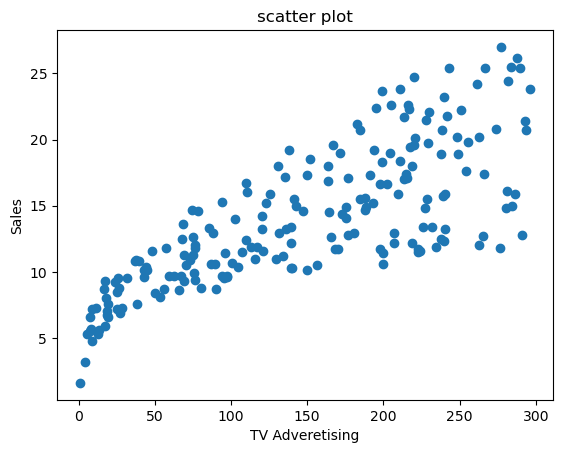

In [8]:
plt.scatter(x= data['TV'],y=data['sales'])
plt.title('scatter plot')
plt.xlabel('TV Adveretising')
plt.ylabel('Sales')

**Model Building**

In [10]:
formula = 'sales ~ TV'
model1 = smf.ols(formula=formula, data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        00:45:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Best line fit**

[Text(0.5, 1.0, 'Linear Fit')]

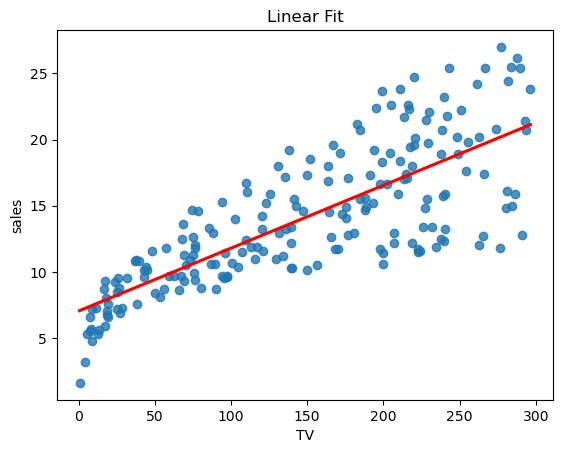

In [11]:
sns.regplot(x="TV", y="sales", data=data,color='#1F77B4',line_kws={'color':'red'},ci=None).set(title = 'Linear Fit')

**Residual standard Error**

In [12]:
predicted_sales_TV_Ad = model1.predict(data['TV'])

In [13]:
RSS = np.sum((data['sales'] - predicted_sales_TV_Ad)**2)
print('RSS = {0}'.format(RSS))

RSS = 2102.5305831313512


In [14]:
RSE = np.sqrt(RSS/data.shape[0])
print('RSE = {0}'.format(RSE))

RSE = 3.2423221486546887


**R Squared statistics**

In [15]:
TSS = np.sum((np.mean(data['sales']) - data['sales'])**2)
R_squared = (TSS-RSS)/TSS

print('R-Squared statistics = {0}'.format(R_squared))

R-Squared statistics = 0.6118750508500711


## Model2 : analyse relation between Sales and Money spent on Radio advertising media

**Scater Plot**

Text(0, 0.5, 'Sales')

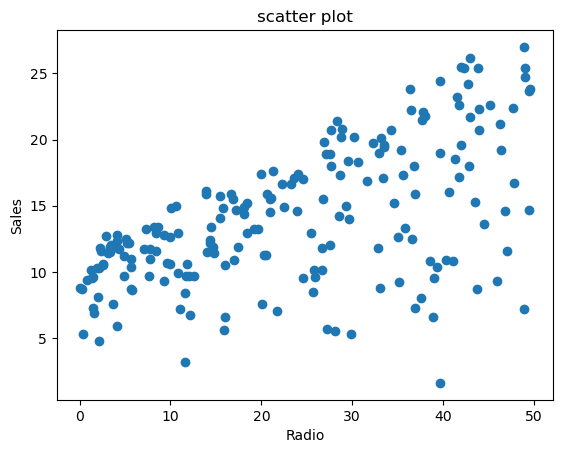

In [16]:
plt.scatter(x= data['radio'],y=data['sales'])
plt.title('scatter plot')
plt.xlabel('Radio')
plt.ylabel('Sales')